## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np


### 2. Load the dataset and display a sample of five rows of the data frame.

In [5]:
db= pd.read_csv(r'C:\Users\ACER\Documents\heart_2020_cleaned.csv')
db.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [7]:
db.shape
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
db.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [14]:
# Display the percentage of missing values in each column
#missing_percentage = db.isnull().mean() * 100
#print("Percentage of missing values in each column:")
#print(missing_percentage)

# Drop rows containing any missing values
db_cleaned = db.dropna()

#print("\nDataFrame after dropping missing values:")
db_cleaned.head()


DataFrame after dropping missing values:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [16]:
# Check for duplicate rows
duplicate_rows = db_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows.")
    
    # Drop duplicate rows
    db_no_duplicates = db_cleaned.drop_duplicates()

    # Display the shape of the DataFrame after dropping duplicates
    print("\nDataFrame shape after dropping duplicates:")
    print(db_no_duplicates.shape)
else:
    print("No duplicate rows found.")

There are 18078 duplicate rows.

DataFrame shape after dropping duplicates:
(301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

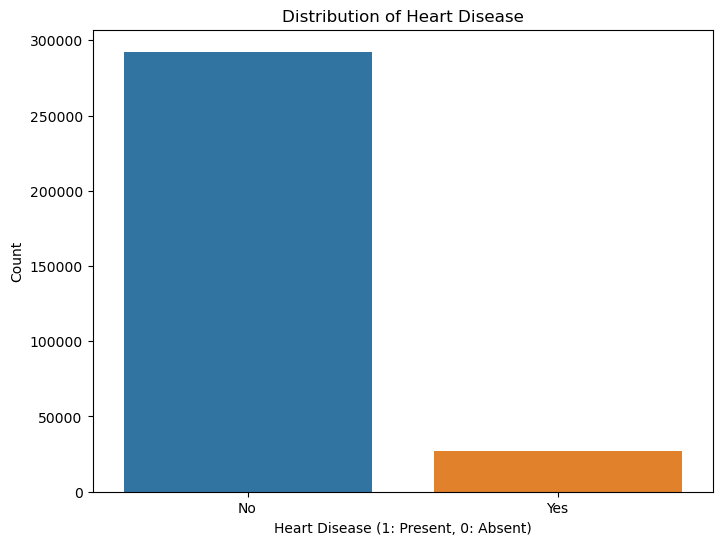


Observations:
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the distribution of the target variable
target_distribution = db['HeartDisease'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=db)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1: Present, 0: Absent)')
plt.ylabel('Count')
plt.show()

# Write observations
print("\nObservations:")
print(target_distribution)

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

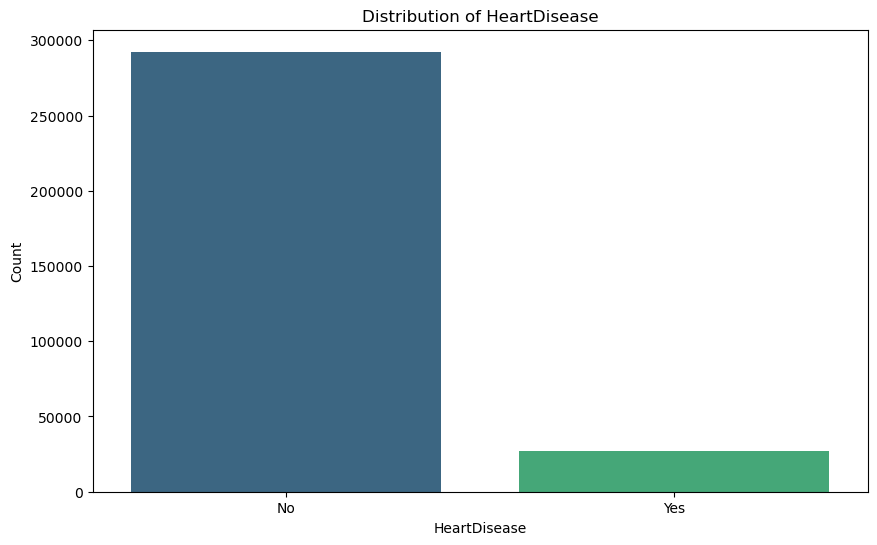

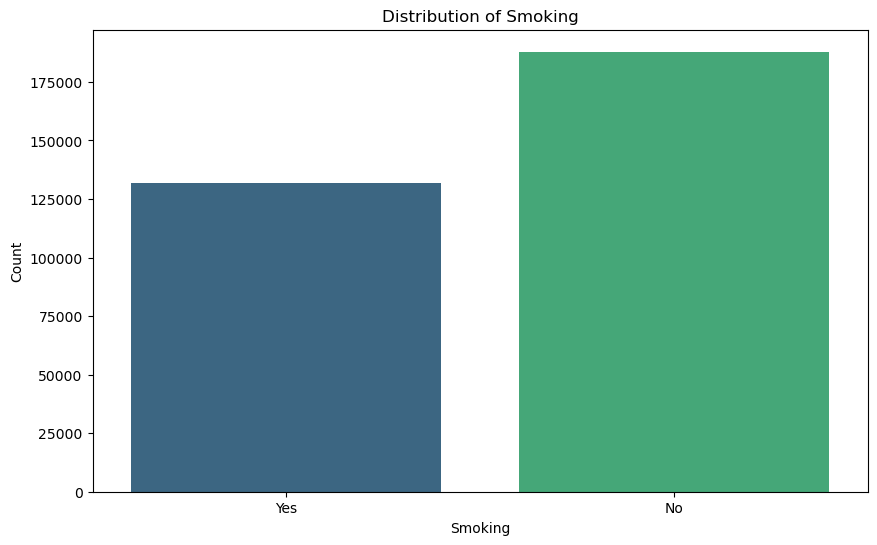

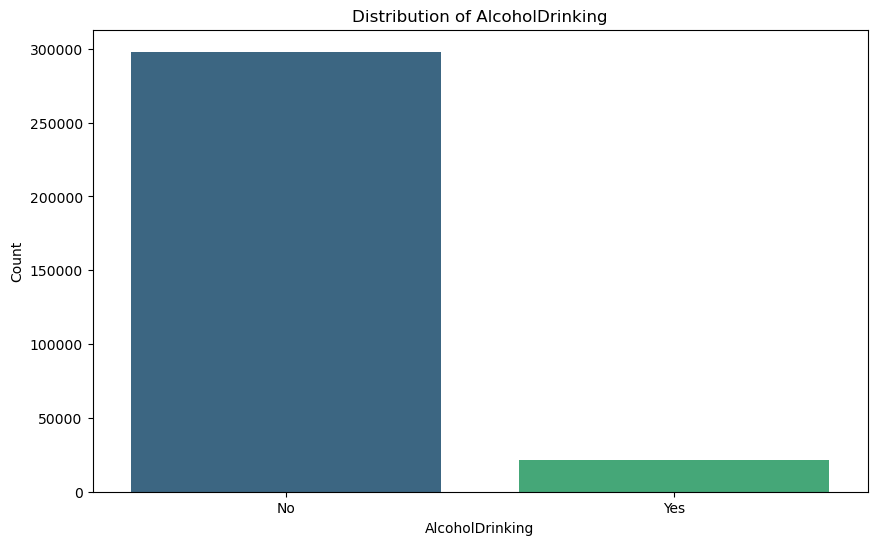

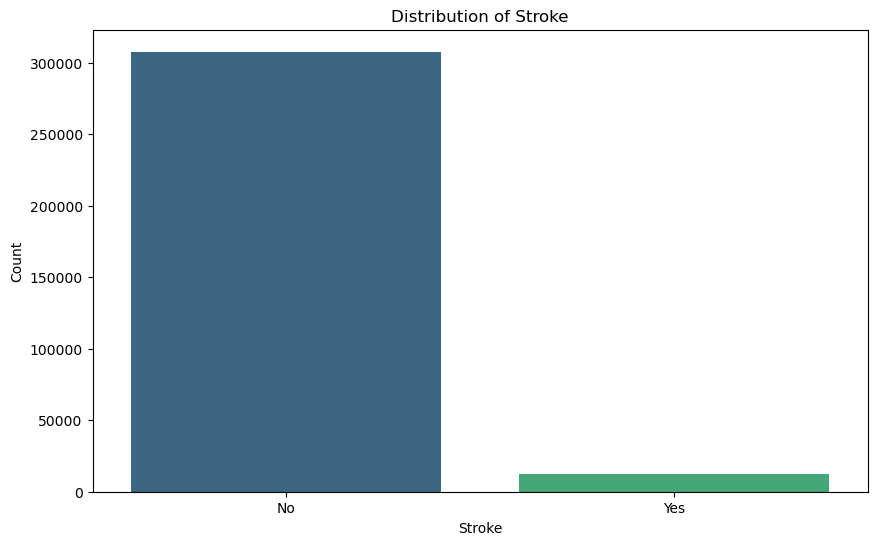

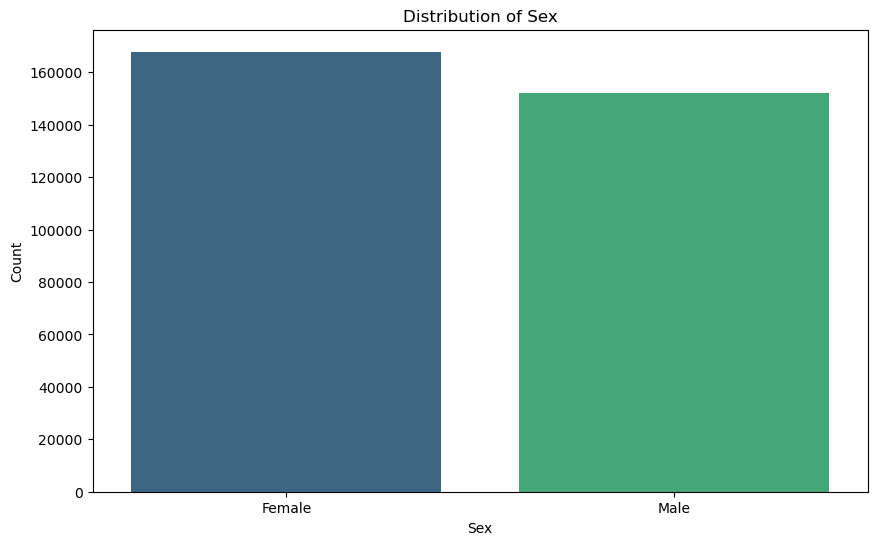

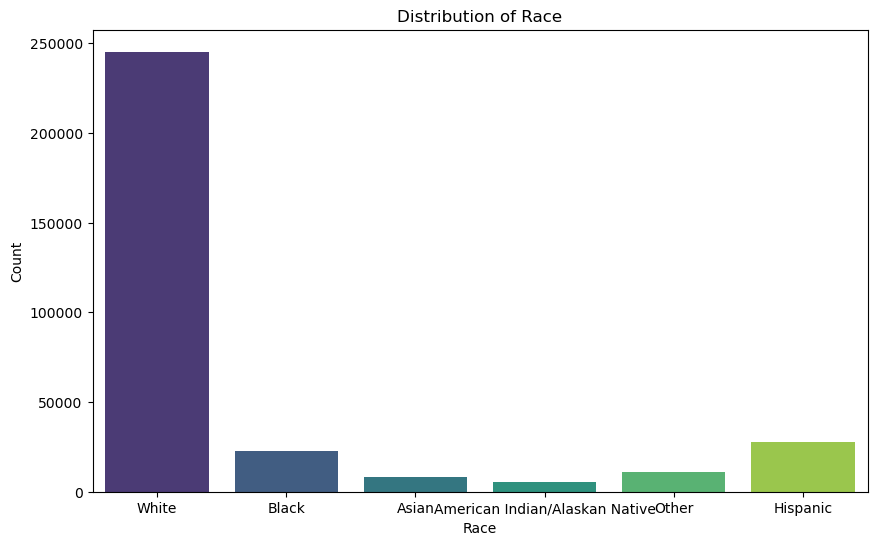

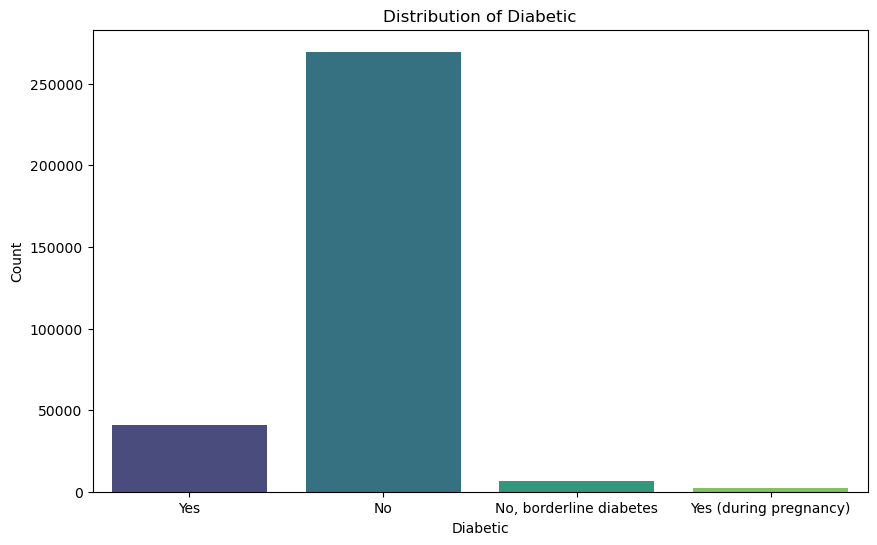

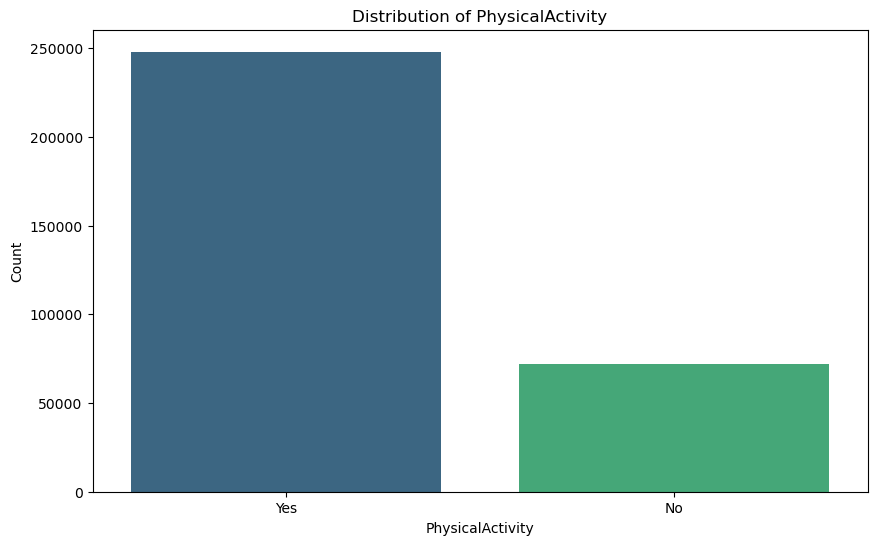

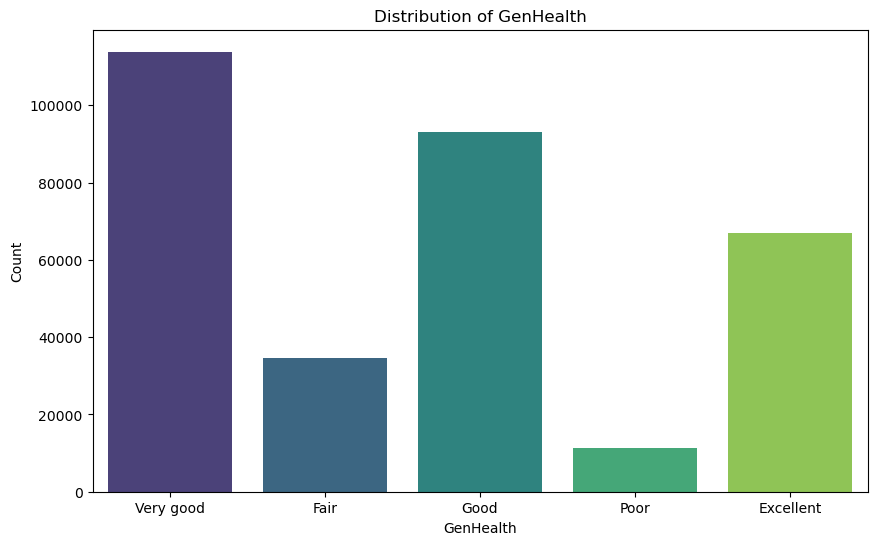

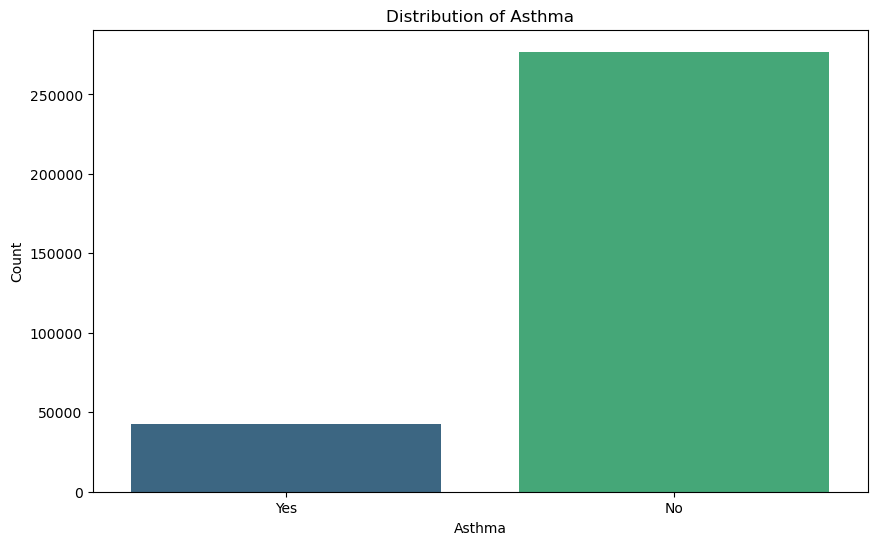

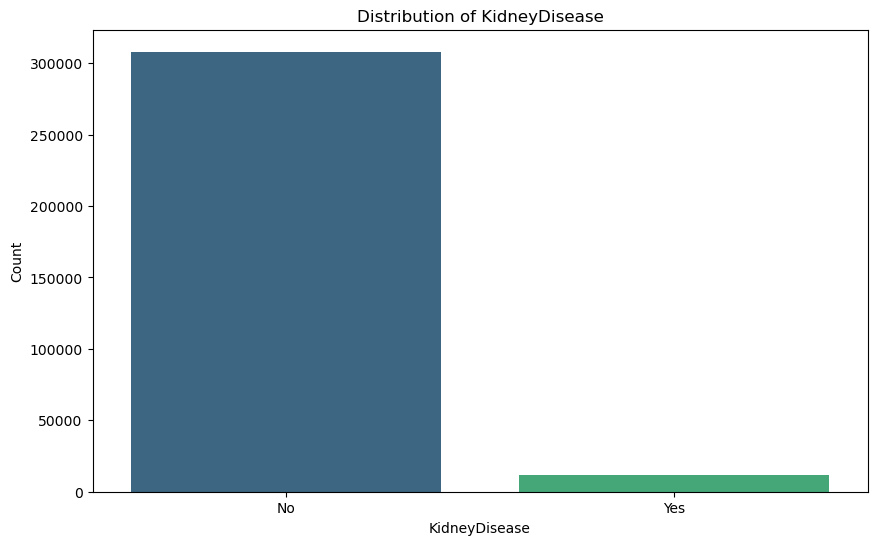

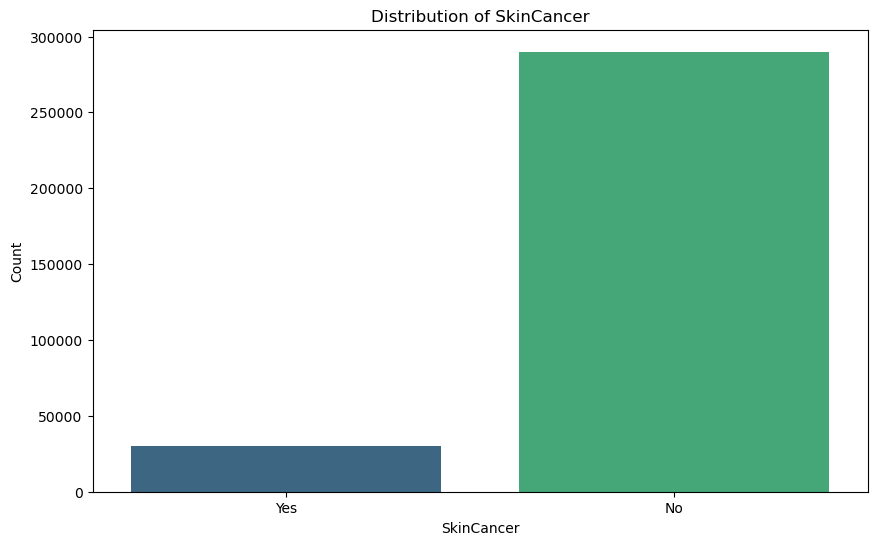


Value counts for SkinCancer:
SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

Observations:
1. Smoking:
Smoking
No     187887
Yes    131908
Name: count, dtype: int64

2. Alcohol Drinking:
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

3. Stroke:
Stroke
No     307726
Yes     12069
Name: count, dtype: int64

4. Sex:
Sex
Female    167805
Male      151990
Name: count, dtype: int64

5. Race:
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

6. Diabetic:
Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

7. Physical Activity:
PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

8. General 

In [25]:
# List of correct categorical features
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
# Visualize distribution with respect to each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=db, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Print value counts for each category
print(f"\nValue counts for {feature}:")
print(db[feature].value_counts())

# Observations
print("\nObservations:")
print("1. Smoking:")
print(db['Smoking'].value_counts())
print("\n2. Alcohol Drinking:")
print(db['AlcoholDrinking'].value_counts())
print("\n3. Stroke:")
print(db['Stroke'].value_counts())
print("\n4. Sex:")
print(db['Sex'].value_counts())
print("\n5. Race:")
print(db['Race'].value_counts())
print("\n6. Diabetic:")
print(db['Diabetic'].value_counts())
print("\n7. Physical Activity:")
print(db['PhysicalActivity'].value_counts())
print("\n8. General Health:")
print(db['GenHealth'].value_counts())
print("\n9. Asthma:")
print(db['Asthma'].value_counts())
print("\n10. Kidney Disease:")
print(db['KidneyDisease'].value_counts())
print("\n11. Skin Cancer:")
print(db['SkinCancer'].value_counts())

In [ ]:
# 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [28]:
# Display unique categories in the 'Diabetic' column before replacement
print("Unique categories in 'Diabetic' column before replacement:")
print(db['Diabetic'].unique())

# Replace specific values in the 'Diabetic' column
db['Diabetic'] = db['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})

# Display unique categories in the 'Diabetic' column after replacement
print("\nUnique categories in 'Diabetic' column after replacement:")
print(db['Diabetic'].unique())

Unique categories in 'Diabetic' column before replacement:
['Yes' 'No']

Unique categories in 'Diabetic' column after replacement:
['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [35]:
 # Display unique categories in the 'HeartDisease' column before replacement
print("Unique categories in 'HeartDisease' column before replacement:")
print(db['HeartDisease'].unique())

# Replace specific values in the 'HeartDisease' column
db['HeartDisease'] = db['HeartDisease'].replace({'No': 0, 'Yes': 1})

# Display unique categories in the 'HeartDisease' column after replacement
print("\nUnique categories in 'HeartDisease' column after replacement:")
print(db['HeartDisease'].unique())



Unique categories in 'HeartDisease' column before replacement:
[0 1]

Unique categories in 'HeartDisease' column after replacement:
[0 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Label encode columns "AgeCategory", "Race", and "GenHealth"
label_encoder = LabelEncoder()
columns_to_label_encode = ["AgeCategory", "Race", "GenHealth"]

for column in columns_to_label_encode:
    db[column] = label_encoder.fit_transform(db[column])

# Dummy encode the rest of the columns
db = pd.get_dummies(db, drop_first=True)

# Display the first few rows of the DataFrame after encoding
print("\nAfter Encoding:")
db.head()


After Encoding:


,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3,30,7,5,4,5,True,False,False,False,False,True,True,True,False,True
1,0,20.34,0,0,12,5,4,7,False,False,True,False,False,False,True,False,False,False
2,0,26.58,20,30,9,5,1,8,True,False,False,False,True,True,True,True,False,False
3,0,24.21,0,0,11,5,2,6,False,False,False,False,False,False,False,False,False,True
4,0,23.71,28,0,4,5,4,8,False,False,False,True,False,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [45]:
# Store the target column in 'y'
y = db['HeartDisease']

# Store the rest of the columns in 'X'
X = db.drop(columns=['HeartDisease'])

# Display the shapes of X and y
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (319795, 17)
Shape of y: (319795,)


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [46]:
from sklearn.model_selection import train_test_split


# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (223856, 17)
Shape of y_train: (223856,)
Shape of X_test: (95939, 17)
Shape of y_test: (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [48]:
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train and X_test from the previous steps

# Identify numerical columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the test data using the same scaler
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Print the standardized data
print("Standardized X_train:")
print(X_train.head())

print("\nStandardized X_test:")
X_test.head()


Standardized X_train:
             BMI  PhysicalHealth  MentalHealth  AgeCategory      Race  \
303145 -1.229576        0.080386     -0.490018    -0.424627  0.497695   
61634   0.391450       -0.423721     -0.490018     0.978429 -0.327781   
117690  0.877286       -0.423721     -0.490018    -0.144016  0.497695   
132104 -1.059769       -0.423721     -0.490018     1.539652  0.497695   
262165 -0.405699       -0.423721     -0.490018     1.259040  0.497695   

        GenHealth  SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
303145  -1.447110   0.628794        False                False       False   
61634    1.159133  -0.067283        False                False       False   
117690  -0.143989  -0.763360        False                False       False   
132104   1.159133   0.628794         True                False       False   
262165   1.159133  -0.067283        False                False       False   

        DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes 

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
271884,-0.110109,-0.423721,2.651356,-1.547073,-1.153256,1.159133,-0.067283,True,False,False,False,False,False,True,False,False,False
270361,-1.003167,-0.423721,2.023082,-1.266461,0.497695,-1.447110,-0.763360,False,False,False,False,False,False,True,False,False,True
219060,0.470064,-0.423721,-0.490018,-0.705239,0.497695,1.159133,-0.763360,True,False,False,False,False,False,True,True,False,False
24010,1.889837,3.357083,-0.490018,0.697818,0.497695,-0.143989,0.628794,False,False,False,False,False,False,False,False,False,False
181930,1.144574,3.357083,3.279631,0.417207,0.497695,-0.795549,-2.155515,True,False,False,True,False,False,False,True,False,True


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [49]:
from sklearn.metrics import accuracy_score

def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    """
    Train a model, make predictions on the test set, and return the accuracy score.

    Parameters:
    - model: The machine learning model to be trained and evaluated.
    - X_train: The training features.
    - y_train: The training target.
    - X_test: The testing features.
    - y_test: The testing target.

    Returns:
    - accuracy: The accuracy score of the model on the test set.
    """

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


In [50]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined

# Create a RandomForestClassifier instance (or any other classifier)
rf_model = RandomForestClassifier(random_state=42)

# Use the function to train, predict, and evaluate
accuracy_result = train_predict_evaluate(rf_model, X_train, y_train, X_test, y_test)

# Print the accuracy score
print(f"Accuracy Score: {accuracy_result}")


Accuracy Score: 0.9056066875827349


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Generate a synthetic dataset for demonstration purposes
# Replace this with your actual data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Stacked Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('ab', AdaBoostClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ], final_estimator=LogisticRegression())
}

# Evaluate each model and print the accuracy score
for model_name, model in models.items():
    accuracy = train_predict_evaluate(model, X_train, y_train, X_test, y_test)
    print(f"{model_name}: Accuracy Score - {accuracy:.4f}")

Logistic Regression: Accuracy Score - 0.8500
KNN: Accuracy Score - 0.8033
Naive Bayes: Accuracy Score - 0.8133
Decision Tree: Accuracy Score - 0.8567
Random Forest: Accuracy Score - 0.8567
AdaBoost: Accuracy Score - 0.8567
Gradient Boosting: Accuracy Score - 0.8700
Stacked Classifier: Accuracy Score - 0.8633


### Conclusion

In [ ]:
Advice for Patients:

Healthy Lifestyle Choices:

Focus on maintaining a healthy lifestyle by engaging in regular physical activity, consuming a balanced diet, and avoiding tobacco and excessive alcohol consumption.
Regular Health Checkups:

Regular health checkups, including blood pressure monitoring, cholesterol levels, and diabetes screening, are essential for early detection and management of risk factors.
Consultation with Healthcare Professionals:

Interpretation of machine learning predictions should be done in consultation with healthcare professionals. Models can provide insights, but clinical expertise is necessary for accurate diagnoses.
Risk Factor Management:

If identified as high-risk by predictive models, patients should actively manage risk factors under medical supervision. This may include medication, lifestyle adjustments, or other interventions.
Predictions and Future Steps:

Individualized Risk Assessments:

Develop personalized risk assessments that consider a patients unique medical history, lifestyle, and genetic factors.
Continuous Monitoring:

Continuous monitoring and updating of models as new data becomes available can improve their accuracy and relevance over time.
Patient Education:

Patient education is crucial. Provide information on the importance of risk factor management, adherence to prescribed treatments, and lifestyle modifications.
Integrating Technology:

Explore the integration of wearable devices and health-tracking technologies to provide real-time data for ongoing risk assessment.
Collaboration with Healthcare Providers:

Encourage patients to collaborate closely with healthcare providers for regular assessments, follow-ups, and adjustments to their healthcare plans.

----
## Happy Learning:)
----